<a href="https://colab.research.google.com/github/saadkiet/CNN-for-FASHION-MNIST-Project-/blob/master/CNN_for_FASHION_MNIST(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Setup and Installation

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 38.8MB/s 
     |████████████████████████████████| 450kB 49.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=92428c6e7cde922f4e2d2fda2084697a28a887691e35ba2523229c9954ac37b0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflo

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [0]:
print(tf.__version__)

2.1.0


# Step 2 : Loading Fashion_Mnist dataset

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [0]:
xtrain,xtest=xtrain/255,xtest/255

In [0]:
xtrain.max(),xtrain.min()

(1.0, 0.0)

In [0]:
ytrain.shape

(60000,)

In [0]:
xtrain.shape

#This input is okay for ANN operation, but for CNN operation, CNN expects a 3D input
#in the shape if NxHxWxC

(60000, 28, 28)

In [0]:
# the data is only 2D!
# convolution expects height x width x color
xtrain = np.expand_dims(xtrain, -1)
xtest = np.expand_dims(xtest, -1)
print(xtrain.shape)

(60000, 28, 28, 1)


# Step 3 : Building CNN model

In [0]:
# Build the model using the functional API
i= Input(shape=xtrain[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu',padding='same')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu',padding='same')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu',padding='same')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(10,activation='softmax')(x)

model=Model(i,x) #1st arguments is a single input/inputs and 2nd argument is list of single output/outputs

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               104908

In [0]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
r=model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 54s 906us/sample - loss: 0.4361 - accuracy: 0.8421 - val_loss: 0.3266 - val_accuracy: 0.8807
Epoch 2/15
60000/60000 [==============================] - 53s 882us/sample - loss: 0.2897 - accuracy: 0.8924 - val_loss: 0.2808 - val_accuracy: 0.8948
Epoch 3/15
60000/60000 [==============================] - 53s 876us/sample - loss: 0.2430 - accuracy: 0.9086 - val_loss: 0.2702 - val_accuracy: 0.8992
Epoch 4/15
60000/60000 [==============================] - 53s 877us/sample - loss: 0.2111 - accuracy: 0.9208 - val_loss: 0.2496 - val_accuracy: 0.9084
Epoch 5/15
60000/60000 [==============================] - 53s 878us/sample - loss: 0.1873 - accuracy: 0.9292 - val_loss: 0.2497 - val_accuracy: 0.9131
Epoch 6/15
60000/60000 [==============================] - 55s 910us/sample - loss: 0.1640 - accuracy: 0.9379 - val_loss: 0.2576 - val_accuracy: 0.9116
Epoch 7/15
60000/60000 [====================

# Step 4 : Model Prediction

In [0]:
ypred = model.predict(xtest)


The predict_classes method is only available for the Sequential class (which is the class of your first model) but not for the Model class (the class of your second model).

With the Model class, you can use the predict method which will give you a vector of probabilities and then get the argmax of this vector (with np.argmax(y_pred1,axis=1)).

In [0]:
#ypred=np.argmax(ypred,axis=1)


In [0]:
print(ypred)

[9 2 1 ... 8 1 5]


In [0]:
print(ypred[10],ytest[10])

4 4


# Step 5 : Model Evaluation

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(ypred,ytest)
print(cm)

print(accuracy_score(ypred,ytest))

[[898   1  20  11   3   0 118   0   5   0]
 [  0 986   1   1   1   0   2   0   1   0]
 [ 14   0 869   6  41   0  54   0   3   1]
 [ 17   7  10 926  12   0  21   0   3   0]
 [  0   4  48  38 888   0  49   0   3   0]
 [  1   0   0   0   0 978   0   4   2   4]
 [ 64   1  52  15  55   0 748   0   2   0]
 [  0   0   0   0   0  14   0 978   3  30]
 [  6   1   0   3   0   0   8   0 978   0]
 [  0   0   0   0   0   8   0  18   0 965]]
0.9214


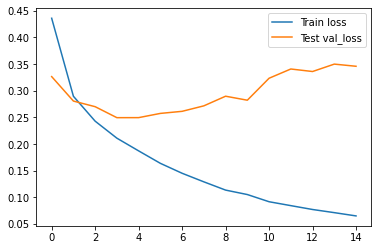

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Test val_loss')
plt.legend()

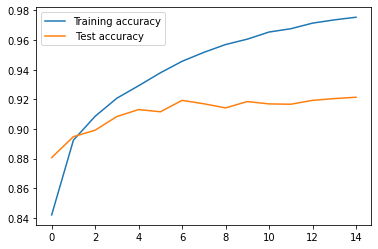

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label=' Test accuracy')
plt.legend()

Confusion matrix, without normalization
[[898   0  14  17   0   1  64   0   6   0]
 [  1 986   0   7   4   0   1   0   1   0]
 [ 20   1 869  10  48   0  52   0   0   0]
 [ 11   1   6 926  38   0  15   0   3   0]
 [  3   1  41  12 888   0  55   0   0   0]
 [  0   0   0   0   0 978   0  14   0   8]
 [118   2  54  21  49   0 748   0   8   0]
 [  0   0   0   0   0   4   0 978   0  18]
 [  5   1   3   3   3   2   2   3 978   0]
 [  0   0   1   0   0   4   0  30   0 965]]


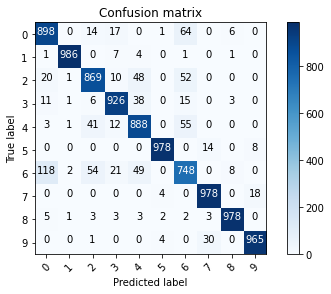

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

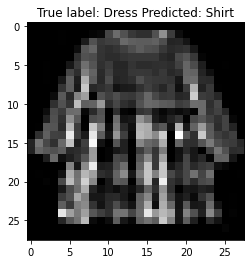

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[ytest[i]], labels[p_test[i]]));

# Alternative way of building the model (Sequential way)


In [0]:
xtrain.shape

(60000, 28, 28, 1)

In [0]:
model1=tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu',input_shape=[28, 28, 1]),
       tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu'),
       tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(512,activation='relu'),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(10,activation='softmax')                       
                                                      ])

In [0]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0

In [0]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
zz=model1.fit(xtest,ytest,epochs=15,validation_data=(xtest,ytest))

Train on 10000 samples, validate on 10000 samples
Epoch 1/15
10000/10000 [==============================] - 6s 627us/sample - loss: 0.8135 - accuracy: 0.7035 - val_loss: 0.5389 - val_accuracy: 0.7987
Epoch 2/15
10000/10000 [==============================] - 6s 581us/sample - loss: 0.5378 - accuracy: 0.7986 - val_loss: 0.4345 - val_accuracy: 0.8391
Epoch 3/15
10000/10000 [==============================] - 6s 581us/sample - loss: 0.4658 - accuracy: 0.8236 - val_loss: 0.3871 - val_accuracy: 0.8532
Epoch 4/15
10000/10000 [==============================] - 6s 588us/sample - loss: 0.4181 - accuracy: 0.8405 - val_loss: 0.3643 - val_accuracy: 0.8584
Epoch 5/15
10000/10000 [==============================] - 6s 594us/sample - loss: 0.3786 - accuracy: 0.8591 - val_loss: 0.2998 - val_accuracy: 0.8881
Epoch 6/15
10000/10000 [==============================] - 6s 597us/sample - loss: 0.3462 - accuracy: 0.8680 - val_loss: 0.2876 - val_accuracy: 0.8895
Epoch 7/15
10000/10000 [==========================

In [0]:
ypred2=model1.predict_classes(xtest)

In [0]:
print(ypred[2],ytest[2])

1 1


In [0]:
cm1=confusion_matrix(ypred2,ytest)
print(cm1)

print(accuracy_score(ypred2,ytest))

[[ 969    0    2    3    0    0   20    0    0    0]
 [   0  993    0    0    0    0    0    0    0    0]
 [  11    0  977    4   36    0   48    0    0    0]
 [   2    5    1  979    6    0    6    0    0    0]
 [   0    0    8   10  943    0   16    0    2    0]
 [   0    0    0    0    0 1000    0    2    0    0]
 [  18    2   11    4   15    0  908    0    0    0]
 [   0    0    0    0    0    0    0  993    0    0]
 [   0    0    1    0    0    0    2    0  998    0]
 [   0    0    0    0    0    0    0    5    0 1000]]
0.976


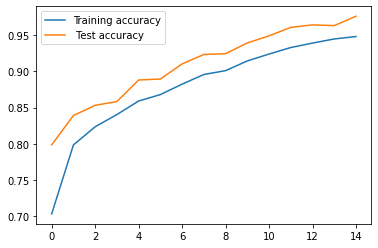

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(zz.history['accuracy'], label='Training accuracy')
plt.plot(zz.history['val_accuracy'], label=' Test accuracy')
plt.legend()

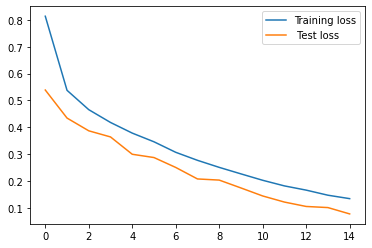

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(zz.history['loss'], label='Training loss')
plt.plot(zz.history['val_loss'], label=' Test loss')
plt.legend()